# Sprint セグメンテーション1

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

google colaboで実行しました

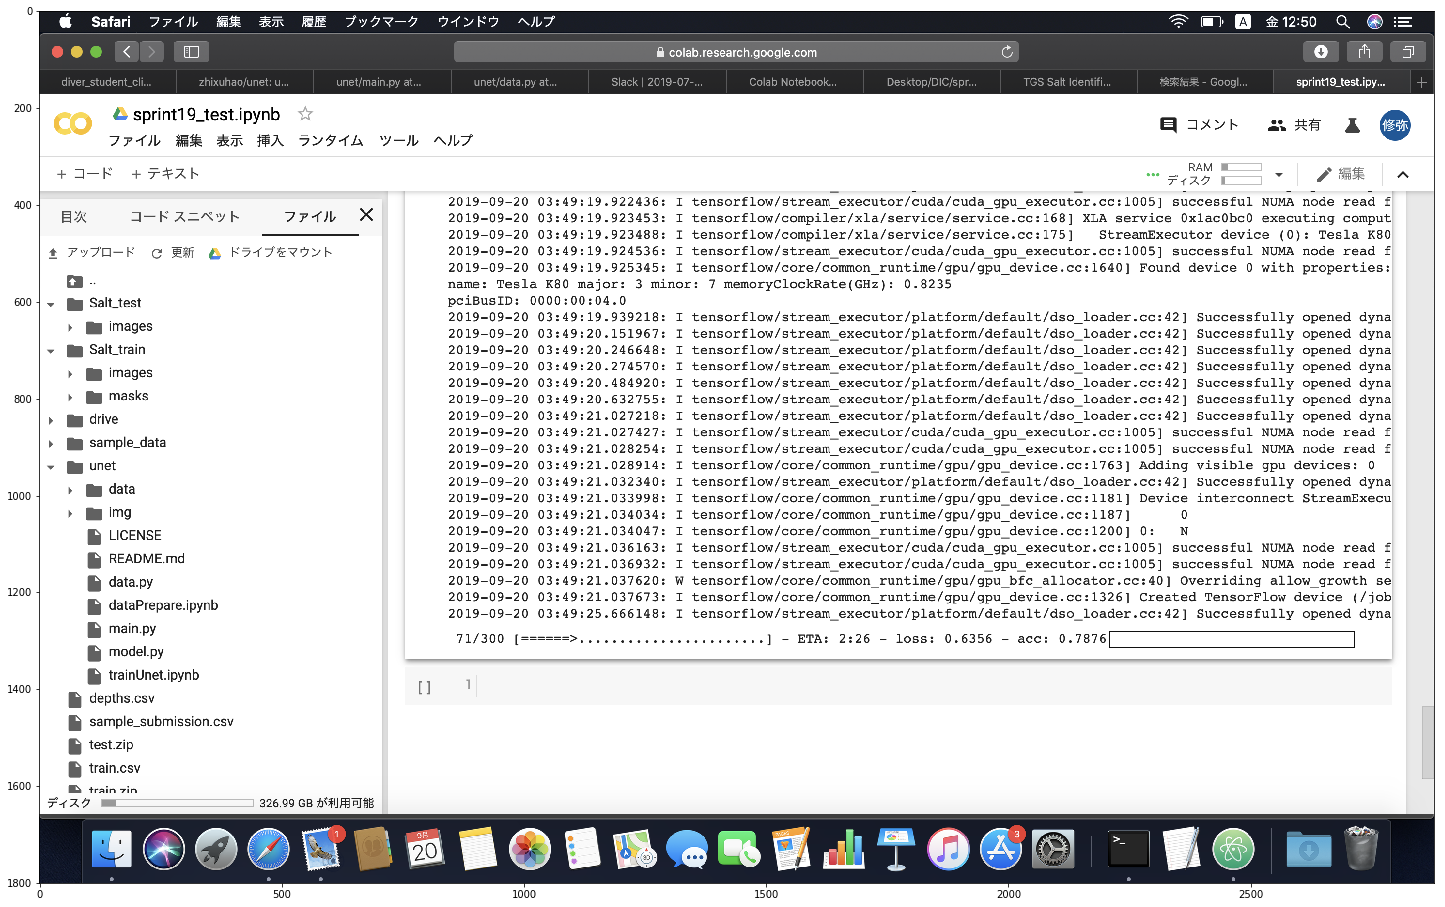

In [4]:
#学習
im = Image.open("/Users/morishuuya/Desktop/DIC/sprint/sprint19/sprint19_pic1.png")
im_list = np.asarray(im)
plt.figure(figsize=(25, 25))
plt.imshow(im_list)
plt.show()

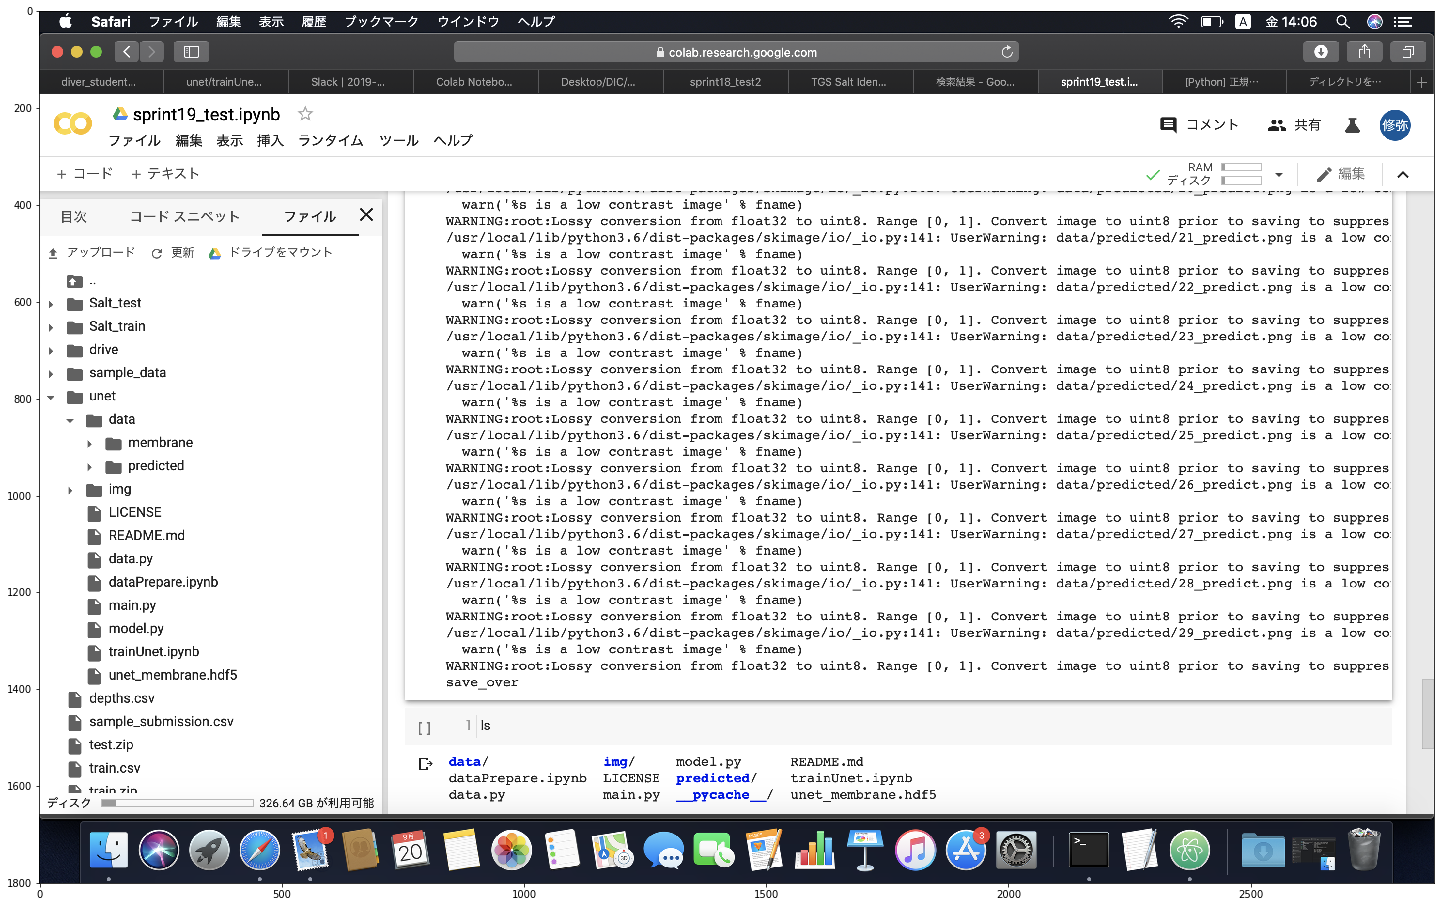

In [5]:
#学習終了、保存
im = Image.open("/Users/morishuuya/Desktop/DIC/sprint/sprint19/sprint19_pic2.png")
im_list = np.asarray(im)
plt.figure(figsize=(25, 25))
plt.imshow(im_list)
plt.show()

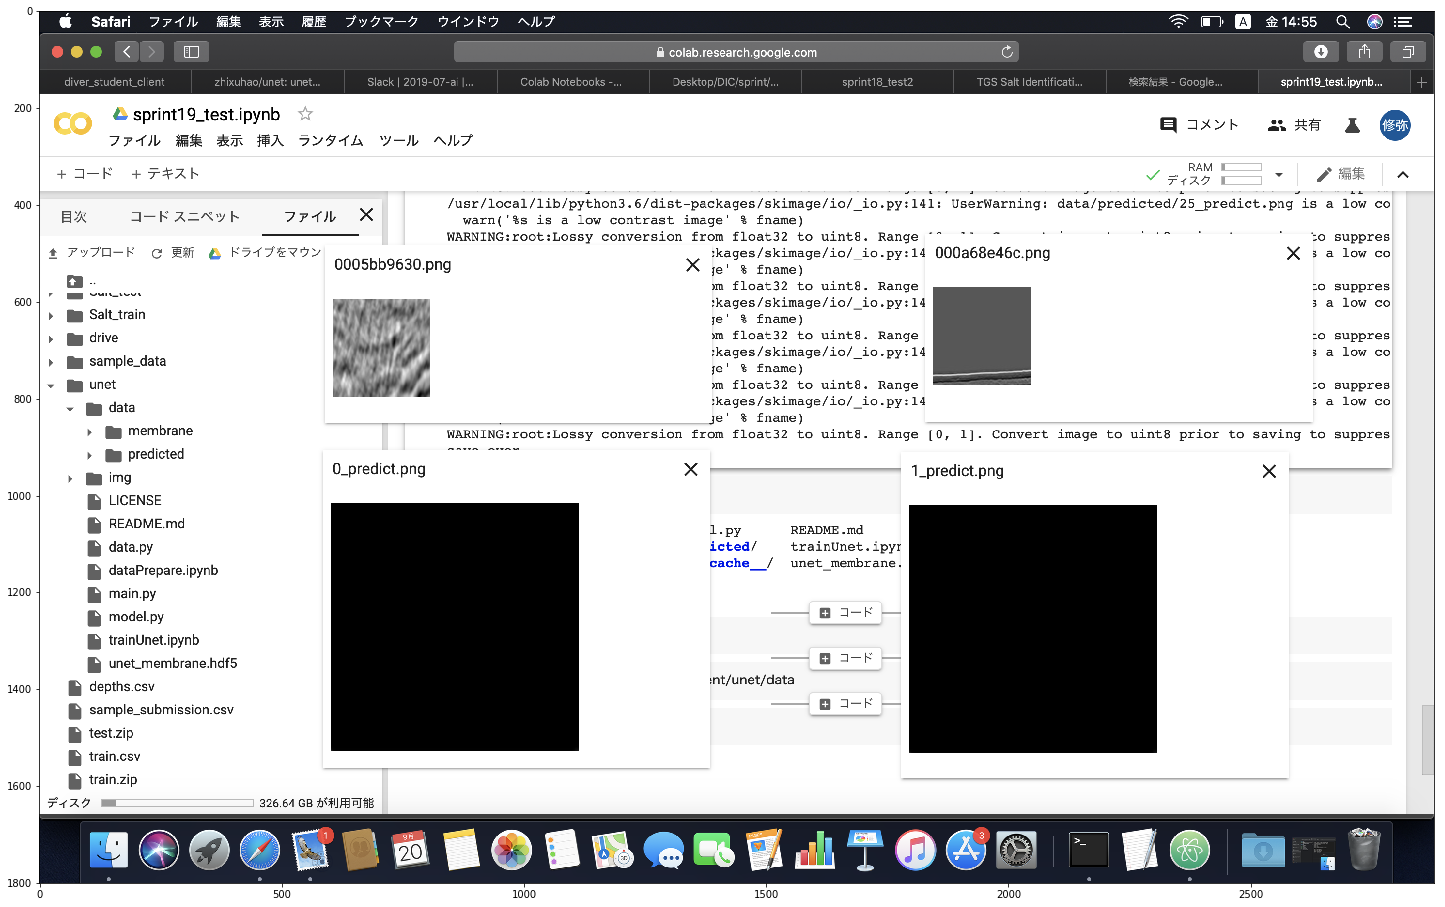

In [7]:
#推定、結果
#上がテスト画像、下がセグメンテーション画像です
im = Image.open("/Users/morishuuya/Desktop/DIC/sprint/sprint19/sprint19_pic3.png")
im_list = np.asarray(im)
plt.figure(figsize=(25, 25))
plt.imshow(im_list)
plt.show()

# 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

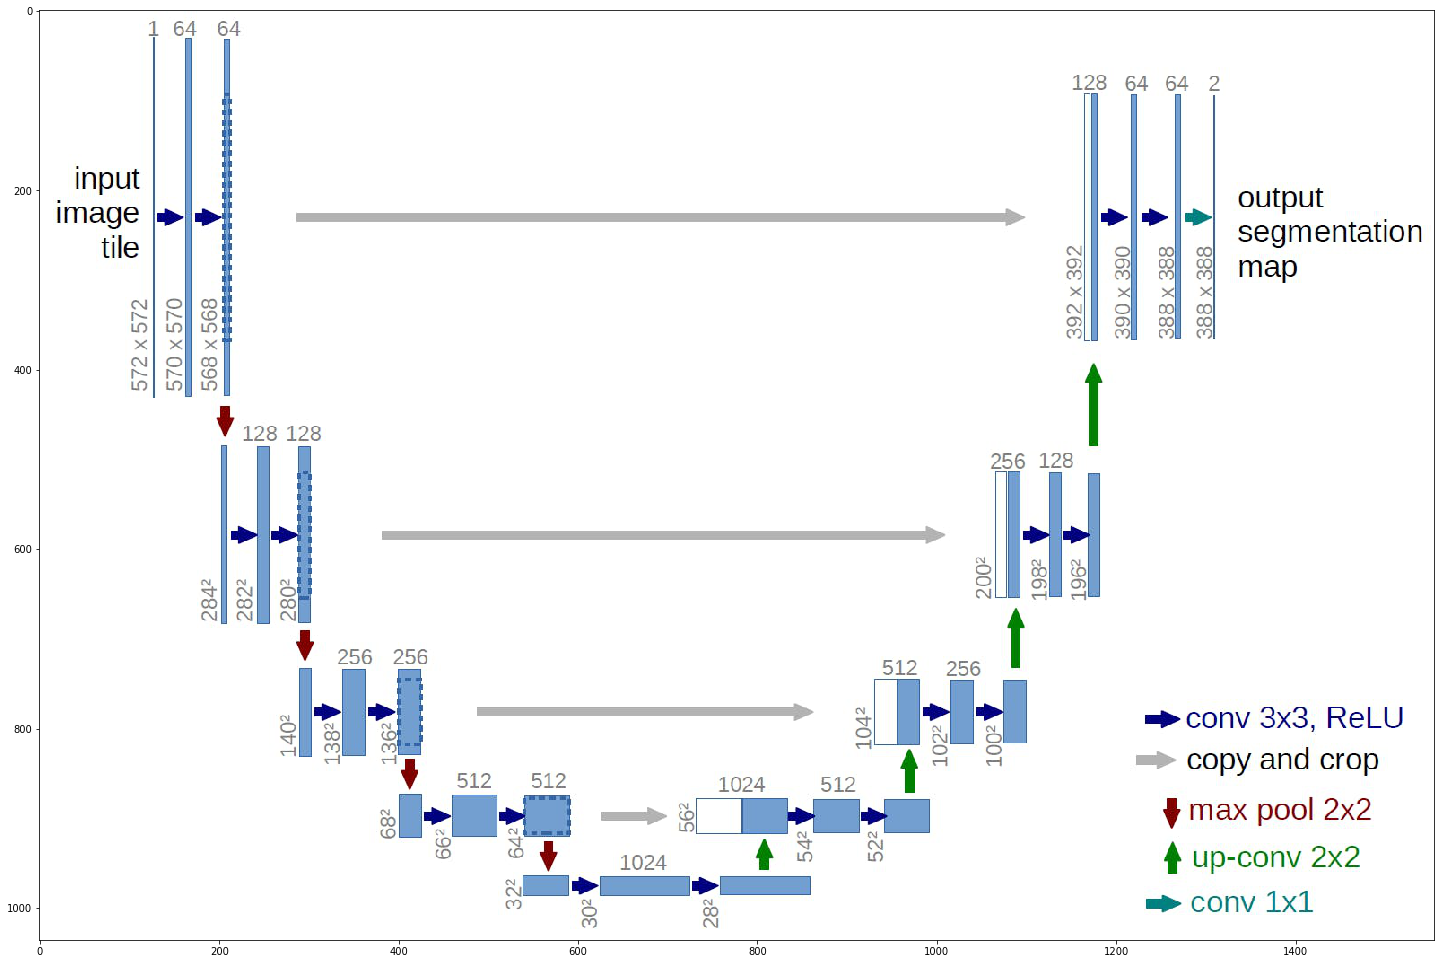

In [8]:
im = Image.open("/Users/morishuuya/Desktop/DIC/sprint/sprint19/sprint19_pic4.png")
im_list = np.asarray(im)
plt.figure(figsize=(25, 25))
plt.imshow(im_list)
plt.show()

<pre>
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


## 畳み込み、ダウンサンプリング
<pre>
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

上記の処理で、畳み込みおよびダウンサンプリングを行なっている。
これだけだと通常のCNNのように見える

## 最終畳み込み、ドロップアウト
<pre>
 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
 drop5 = Dropout(0.5)(conv5)
 
 上記が最終のダウンサンプリングの畳み込み、ドロップアウトの処理も行なっている。

## アップサンプリング、結合
<pre>
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))

Upsampling2Dでアップサンプリングの処理を行なっている。
その上で畳み込みをしている

merge6 = concatenate([drop4,up6], axis = 3)

ダウンサンプリングで保存した特徴量マップを結合させている

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

その後通常の畳み込み

## 最後の活性化関数
<pre>
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

畳み込みの出力チャネルをクラス数にし、sigmoid関数で二値分類を行なっている

# モデル作成
<pre>
model = Model(input = inputs, output = conv10)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

最後にModel関数でkerasのモデルとして保存
コンパイルで最適化手法、ロスの計算方法を指定して

return model

モデルを返している